<a href="https://colab.research.google.com/github/JessyUrru/Actividad-2-Mod-4-MASTER-IA-IBM/blob/main/Data_Understanding_TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importando librerias

import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns
import plotly.express as px

In [3]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/JessyUrru/Datasets/main/ds_job.csv")
df_raw.head()

,empleado_id,ciudad,indice_desarrollo_ciudad,genero,experiencia_relevante,universidad_matriculado,nivel_educacion,educacion,experiencia,tamano_compania,tipo_compania,ultimo_nuevo_trabajo,horas_formacion,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Variable objetivo es target 

- Valor 1 significa que 'Busca un cambio de trabajo'

- Valor 0 significa que 'No busca un cambio de trabajo'

Data Wragnling

In [4]:
# Cantidad de registros, filas y columnas

df_raw.shape

(19158, 14)

In [5]:
# Nombre de las columnas que contiene el dataset

df_raw.columns

Index(['empleado_id', 'ciudad', 'indice_desarrollo_ciudad', 'genero',
       'experiencia_relevante', 'universidad_matriculado', 'nivel_educacion',
       'educacion', 'experiencia', 'tamano_compania', 'tipo_compania',
       'ultimo_nuevo_trabajo', 'horas_formacion', 'target'],
      dtype='object')

In [6]:
# Información de las columnas

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   empleado_id               19158 non-null  int64  
 1   ciudad                    19158 non-null  object 
 2   indice_desarrollo_ciudad  19158 non-null  float64
 3   genero                    14650 non-null  object 
 4   experiencia_relevante     19158 non-null  object 
 5   universidad_matriculado   18772 non-null  object 
 6   nivel_educacion           18698 non-null  object 
 7   educacion                 16345 non-null  object 
 8   experiencia               19093 non-null  object 
 9   tamano_compania           13220 non-null  object 
 10  tipo_compania             13018 non-null  object 
 11  ultimo_nuevo_trabajo      18735 non-null  object 
 12  horas_formacion           19158 non-null  int64  
 13  target                    19158 non-null  float64
dtypes: flo

El dataset está compuesto principalmente por variables categóricas que tendremos que manejar.

In [7]:
# Variables numéricas

num_var = df_raw.select_dtypes(exclude='object')
num_var

,empleado_id,indice_desarrollo_ciudad,horas_formacion,target
0,8949,0.920,36,1.0
1,29725,0.776,47,0.0
2,11561,0.624,83,0.0
3,33241,0.789,52,1.0
4,666,0.767,8,0.0
...,...,...,...,...
19153,7386,0.878,42,1.0
19154,31398,0.920,52,1.0
19155,24576,0.920,44,0.0
19156,5756,0.802,97,0.0


In [9]:
# Variables Categóricas

categ_var = df_raw.select_dtypes(include='object')
categ_var

,ciudad,genero,experiencia_relevante,universidad_matriculado,nivel_educacion,educacion,experiencia,tamano_compania,tipo_compania,ultimo_nuevo_trabajo
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...,...,...
19153,city_173,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1
19154,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4
19155,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,city_65,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2


In [10]:
df_raw.isna().any()

empleado_id                 False
ciudad                      False
indice_desarrollo_ciudad    False
genero                       True
experiencia_relevante       False
universidad_matriculado      True
nivel_educacion              True
educacion                    True
experiencia                  True
tamano_compania              True
tipo_compania                True
ultimo_nuevo_trabajo         True
horas_formacion             False
target                      False
dtype: bool

In [11]:
#Entrega la cantidad de datos nulos por columna

df_raw.isnull().sum()

empleado_id                    0
ciudad                         0
indice_desarrollo_ciudad       0
genero                      4508
experiencia_relevante          0
universidad_matriculado      386
nivel_educacion              460
educacion                   2813
experiencia                   65
tamano_compania             5938
tipo_compania               6140
ultimo_nuevo_trabajo         423
horas_formacion                0
target                         0
dtype: int64

In [12]:
# Porcentaje de nulos por columna

df_raw.isnull().sum() / len(df_raw) * 100

empleado_id                  0.000000
ciudad                       0.000000
indice_desarrollo_ciudad     0.000000
genero                      23.530640
experiencia_relevante        0.000000
universidad_matriculado      2.014824
nivel_educacion              2.401086
educacion                   14.683161
experiencia                  0.339284
tamano_compania             30.994885
tipo_compania               32.049274
ultimo_nuevo_trabajo         2.207955
horas_formacion              0.000000
target                       0.000000
dtype: float64

Vemos que hay un gran porcentaje de nulos en algunas variables. Las que muestran más de 10% de nulos son:

- educación
- genero
- tamano_compania
- tipo_compania

In [13]:
# Busco si hay duplicados en la columna empleado_id. Si la suma de los duplicados me da 0 se obtiene como resultado True

sum(df_raw.duplicated(subset = 'empleado_id')) == 0

True

Esto significa que el campo empleado_id es único por registro y se puede tomar como un identificador.

**Analizando la variable objetivo - target**

In [14]:
# verifico la cantidad de registros que hay para resultado en la variable objetivo 'target'
df_raw.target.value_counts()


0.0    14381
1.0     4777
Name: target, dtype: int64

In [15]:
total_target = df_raw.target.value_counts()
percentage = (total_target/len(df_raw)*100)
missing_data = pd.concat([total_target, percentage], axis=1, keys=['Total', '%'])
missing_data.head(20)

,Total,%
0.0,14381,75.065247
1.0,4777,24.934753


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



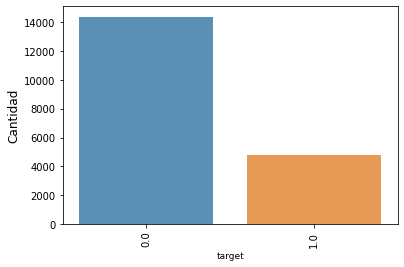

In [16]:
var_target = df_raw['target'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(var_target.index, var_target.values, alpha=0.8)
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
plt.show();

Podemos ver que el dataset se encuentra desbalanceado, ya que tenemos sólo un 24% de los registros para el target = 1 (Busca un cambio de trabajo). Una manera de poder manejar este desbalance podría ser utilizar SMOTE. 

**Analizando el resto de variables**

Index([
       'experiencia_relevante', 'universidad_matriculado', 'nivel_educacion',
       'educacion', 'experiencia', 'tamano_compania', 'tipo_compania',
       'ultimo_nuevo_trabajo', 'horas_formacion', 'target'],
      dtype='object')

'empleado_id', 'ciudad', 'indice_desarrollo_ciudad', 'genero','universidad_matriculado','ultimo_nuevo_trabajo', 

Nivel de educación

In [17]:
print("Cantidad de registros sin información: ", df_raw['nivel_educacion'].isna().sum())
fig = px.pie(df_raw['nivel_educacion'].value_counts(), values='nivel_educacion', 
             names = df_raw['nivel_educacion'].value_counts().index,title = 'nivel_educacion',template='ggplot2')
fig.show()

Cantidad de registros sin información:  460


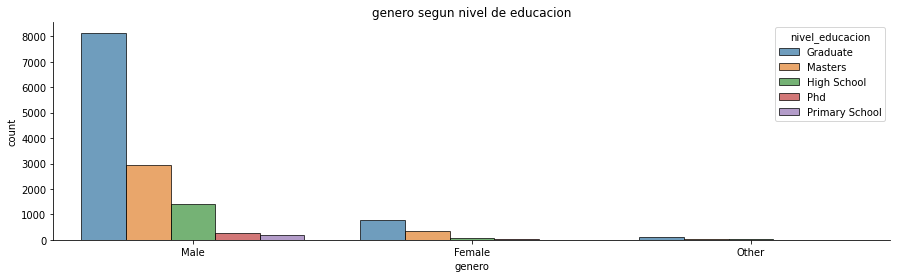

In [18]:
plt.figure(figsize=[15,4])
sns.countplot(x='genero', hue='nivel_educacion',edgecolor="black", alpha=0.7, data=df_raw)
sns.despine()
plt.title("genero segun nivel de educacion")
plt.show()

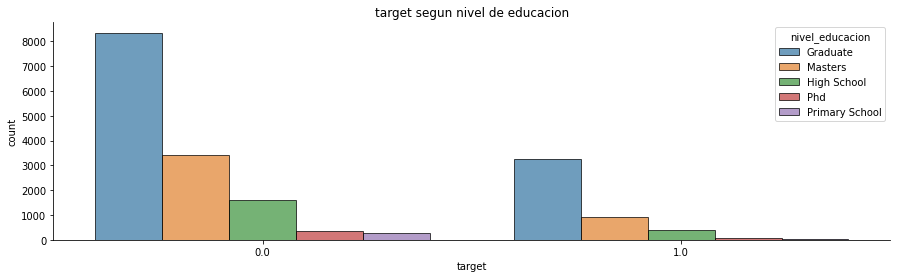

In [19]:
plt.figure(figsize=[15,4])
sns.countplot(x='target', hue='nivel_educacion',edgecolor="black", alpha=0.7, data=df_raw)
sns.despine()
plt.title("target segun nivel de educacion")
plt.show()

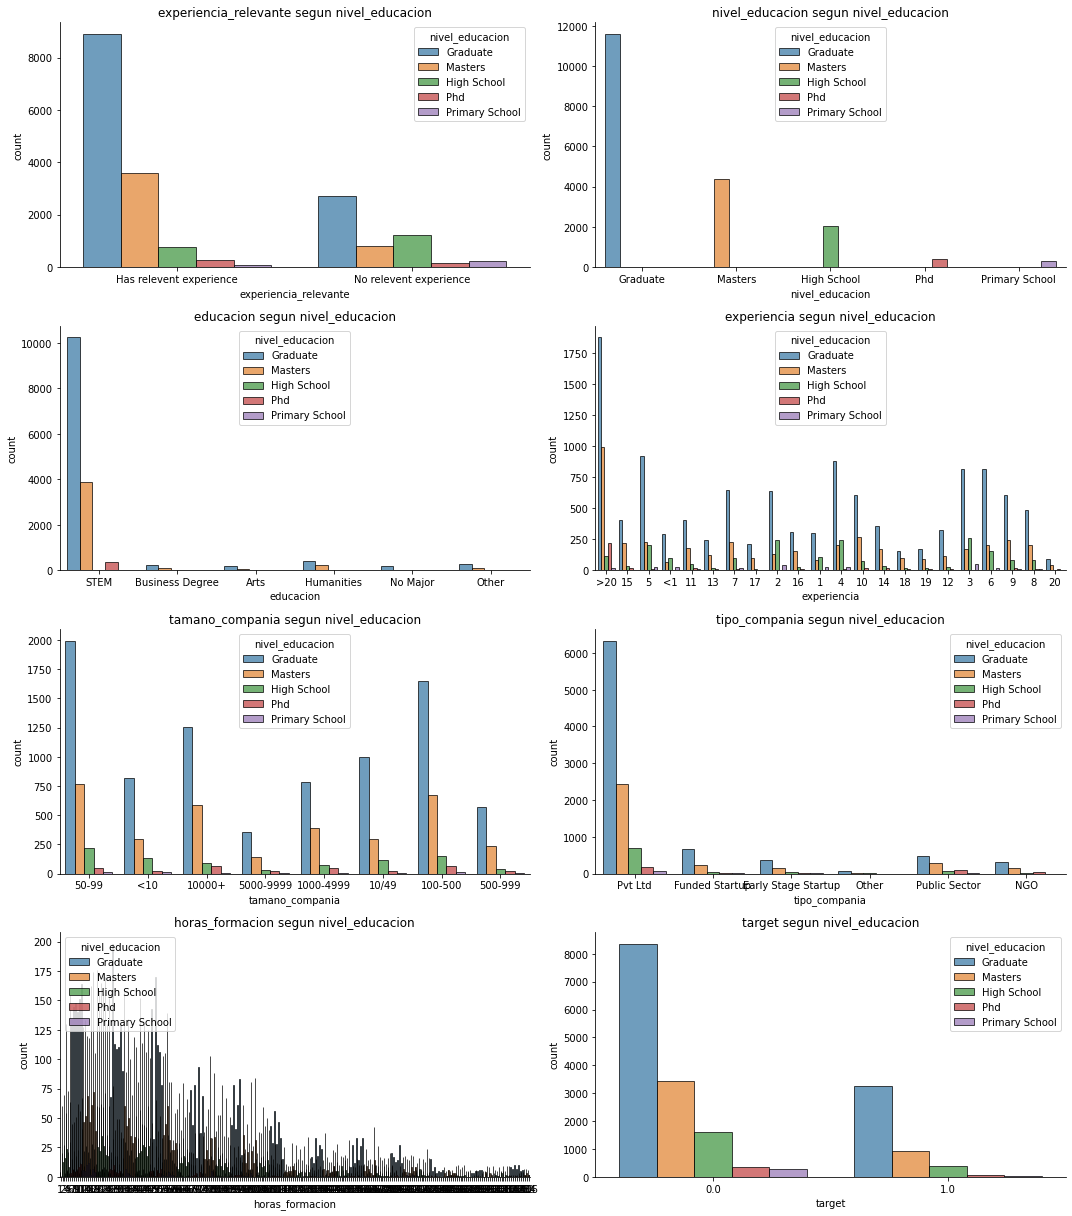

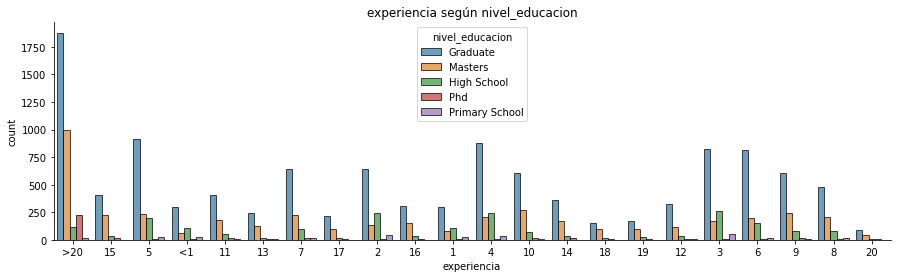

In [20]:
plt.figure(figsize=[15,17])
campos= ['experiencia_relevante', 'nivel_educacion','educacion', 'experiencia', 'tamano_compania', 'tipo_compania','horas_formacion', 'target']
n=1
for f in campos:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='nivel_educacion', edgecolor="black", alpha=0.7, data=df_raw)
    sns.despine()
    plt.title("{} segun nivel_educacion".format(f))
    n=n+1
plt.tight_layout()
plt.show()


    
plt.figure(figsize=[15,4])
sns.countplot(x='experiencia', hue='nivel_educacion',edgecolor="black", alpha=0.7, data=df_raw)
sns.despine()
plt.title("experiencia según nivel_educacion")
plt.show()


Educacion - Tipo

In [21]:
print("Cantidad de registros sin información: ", df_raw['educacion'].isna().sum())
fig = px.pie(df_raw['educacion'].value_counts(), values='educacion', 
             names = df_raw['educacion'].value_counts().index,title = 'educacion',template='ggplot2')
fig.show()

Cantidad de registros sin información:  2813


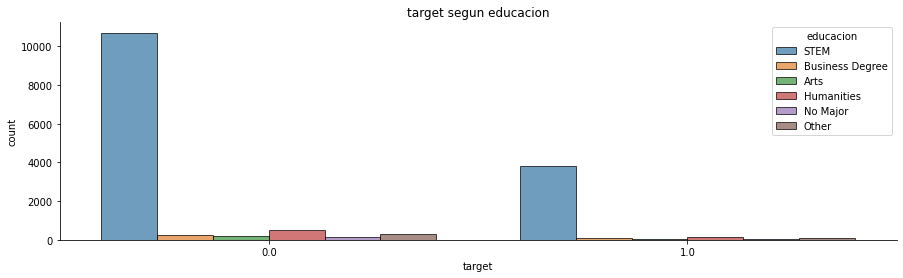

In [22]:
plt.figure(figsize=[15,4])
sns.countplot(x='target', hue='educacion',edgecolor="black", alpha=0.7, data=df_raw)
sns.despine()
plt.title("target segun educacion")
plt.show()

Tamaño de la compañía

In [23]:
print("Cantidad de registros sin información: ", df_raw['tamano_compania'].isna().sum())
fig = px.pie(df_raw['tamano_compania'].value_counts(), values='tamano_compania', 
             names = df_raw['tamano_compania'].value_counts().index,title = 'tamano_compania',template='ggplot2')
fig.show()

Cantidad de registros sin información:  5938


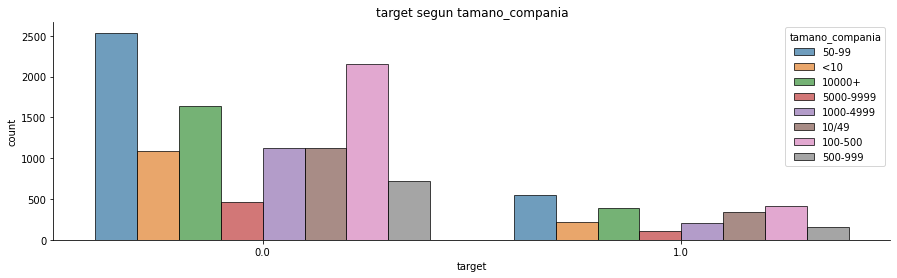

In [24]:
plt.figure(figsize=[15,4])
sns.countplot(x='target', hue='tamano_compania',edgecolor="black", alpha=0.7, data=df_raw)
sns.despine()
plt.title("target segun tamano_compania")
plt.show()

Indice desarrollo ciudad

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



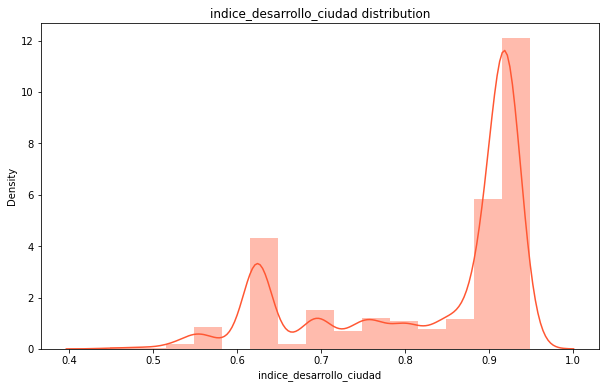

In [31]:
# Distribución de la variable indice desarrollo ciudad

plt.figure(figsize=(10,6))
sns.distplot(df_raw['indice_desarrollo_ciudad'],bins=15,color='#FF5733');
plt.title('indice_desarrollo_ciudad distribution');

In [25]:
df_raw.columns

Index(['empleado_id', 'ciudad', 'indice_desarrollo_ciudad', 'genero',
       'experiencia_relevante', 'universidad_matriculado', 'nivel_educacion',
       'educacion', 'experiencia', 'tamano_compania', 'tipo_compania',
       'ultimo_nuevo_trabajo', 'horas_formacion', 'target'],
      dtype='object')